Tutorial - Part #4 - Image Subtraction
=====================

For image subtraction the package has a module called `propersubtract`, which implements a main `diff` function.


In [1]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize

In [3]:
palette = copy(plt.cm.gray)
palette.set_bad('r', 1.0)
#palette.set_under('r', 1.0)
#palette.set_over('r', 1.0)

In [4]:
import properimage.single_image as si
import properimage.propersubtract as ps

using numpy fft API


In [5]:
ref_path = './../../../data/aligned_eso085-030-004.fit'
new_path = './../../../data/aligned_eso085-030-005.fit'

To get the subtraction we need to run this function by using both paths for example:

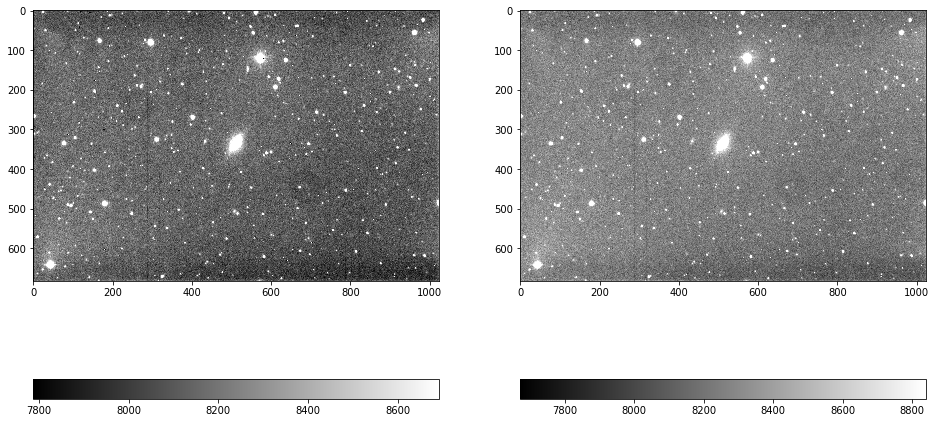

In [6]:
from astropy.io.fits import getdata

plt.figure(figsize=(16, 12))
plt.subplot(121)
ref = getdata(ref_path)
norm = ImageNormalize(ref, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(ref, cmap=plt.cm.gray, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

plt.subplot(122)
ref = getdata(new_path)
norm = ImageNormalize(ref, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(ref, cmap=plt.cm.gray, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

In [32]:
result = ps.diff(ref=ref_path, new=new_path, smooth_psf=False, fitted_psf=True,
                 align=False, iterative=False, beta=False, shift=False)

using single psf, gaussian modeled
updating stamp shape to (21,21)
updating stamp shape to (21,21)
S_corr sigma_clipped_stats 
mean = -4.106055436121256e-06, median = -3.976711070252181e-06, std = 0.00012175134817331649

Subtraction performed in 16.19286823272705 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

In [33]:
D = result[0]
P = result[1]
Scorr = result[2]
mask = result[3]

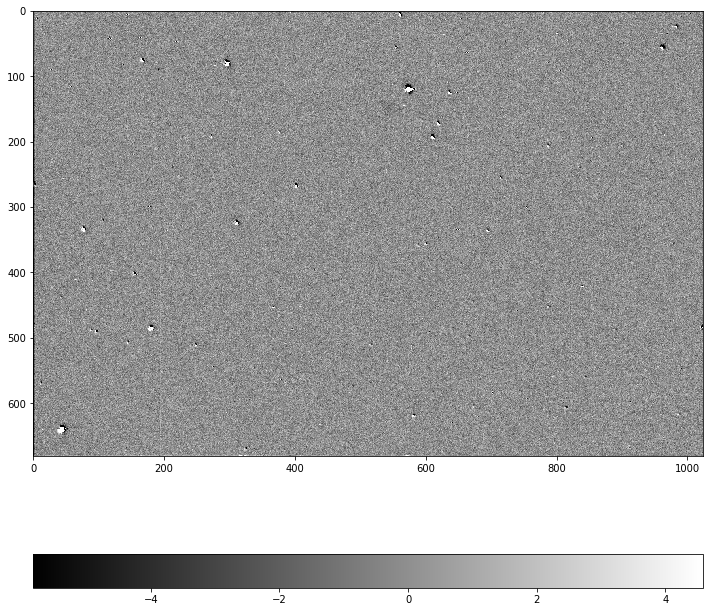

In [34]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

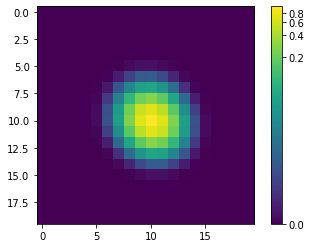

In [35]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

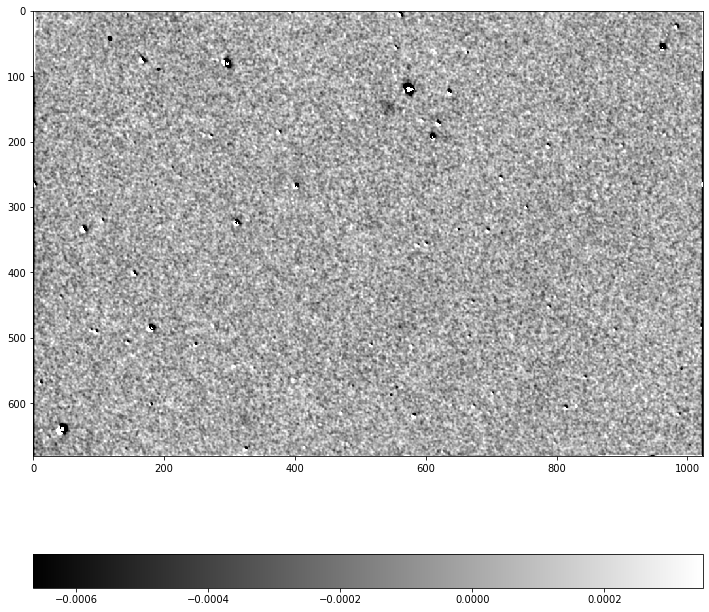

In [36]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

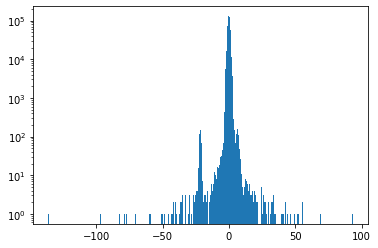

In [37]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

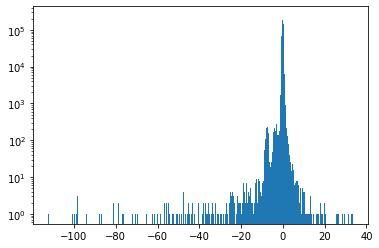

In [38]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

This is related to the quantities derived in Zackay et al. works. 
$S_{corr} = P_D \otimes D$

In [39]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path,
                            align=False, iterative=False, beta=True)

using single psf, gaussian modeled
updating stamp shape to (21,21)
updating stamp shape to (21,21)
Found that beta = [ 0.98135014  0.04777034 -0.02548551]
Took only 11.649222135543823 awesome seconds
The solution was with cost 0.3210708100934259
S_corr sigma_clipped_stats 
mean = -2.516075852528323e-06, median = -2.7910356981768395e-06, std = 0.00011876993212881394

Subtraction performed in 39.62956643104553 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

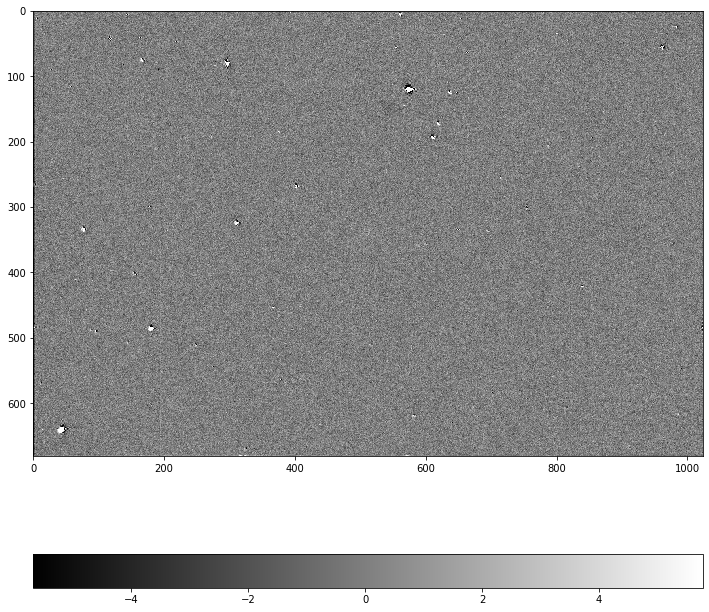

In [40]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

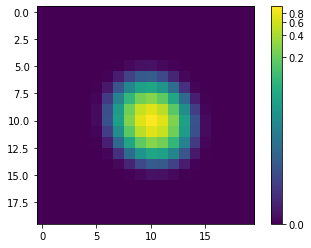

In [41]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

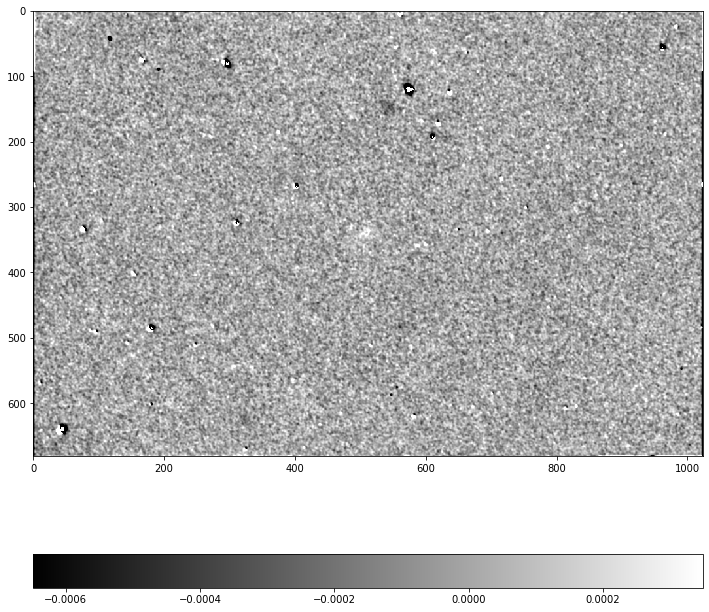

In [42]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

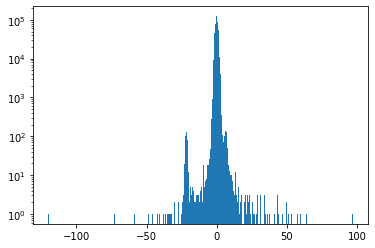

In [43]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

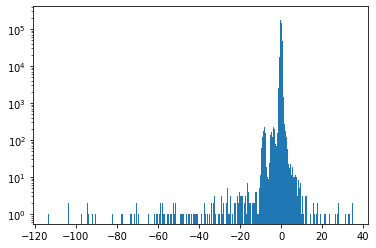

In [44]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

We have the option of using the iterative methods without beta

In [45]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=False)

using single psf, gaussian modeled
updating stamp shape to (21,21)
updating stamp shape to (21,21)
Found that shift = [ 0.04702745 -0.02644272]
Took only 8.84404969215393 awesome seconds
The solution was with cost 0.32143964639703293
S_corr sigma_clipped_stats 
mean = -4.179228145401327e-06, median = -3.9977016110934666e-06, std = 0.00012072721430446997

Subtraction performed in 25.46648931503296 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

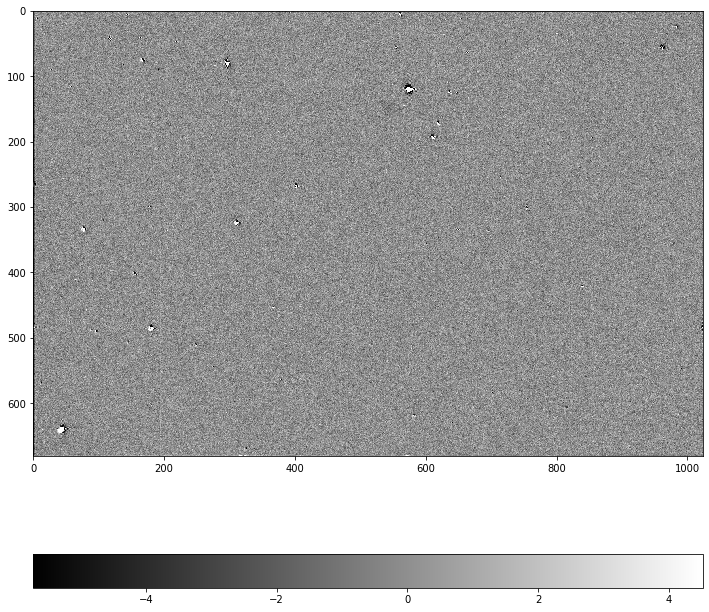

In [47]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

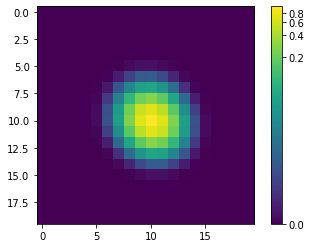

In [48]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

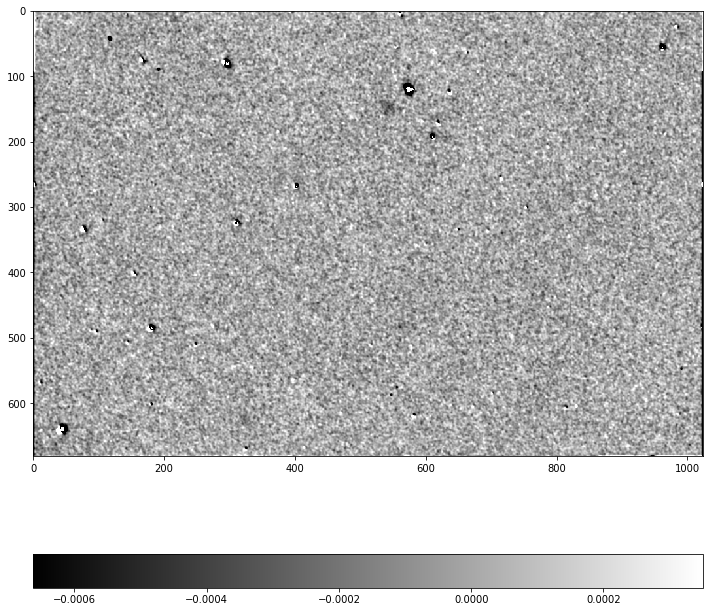

In [49]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

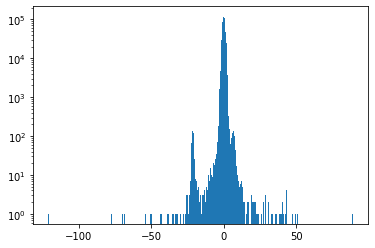

In [50]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

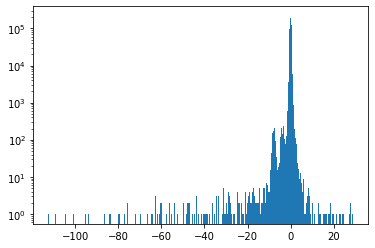

In [51]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

We have the option of using the iterative methods without beta

In [52]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, smooth_psf=False, fitted_psf=True,
                            align=False, iterative=True, beta=True, shift=True)

using single psf, gaussian modeled
updating stamp shape to (21,21)
updating stamp shape to (21,21)
Found that beta = [ 0.98135014  0.04777034 -0.02548551]
Took only 11.469524621963501 awesome seconds
The solution was with cost 0.3210708100934259
S_corr sigma_clipped_stats 
mean = -2.516075852528323e-06, median = -2.7910356981768395e-06, std = 0.00011876993212881394

Subtraction performed in 24.76676893234253 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

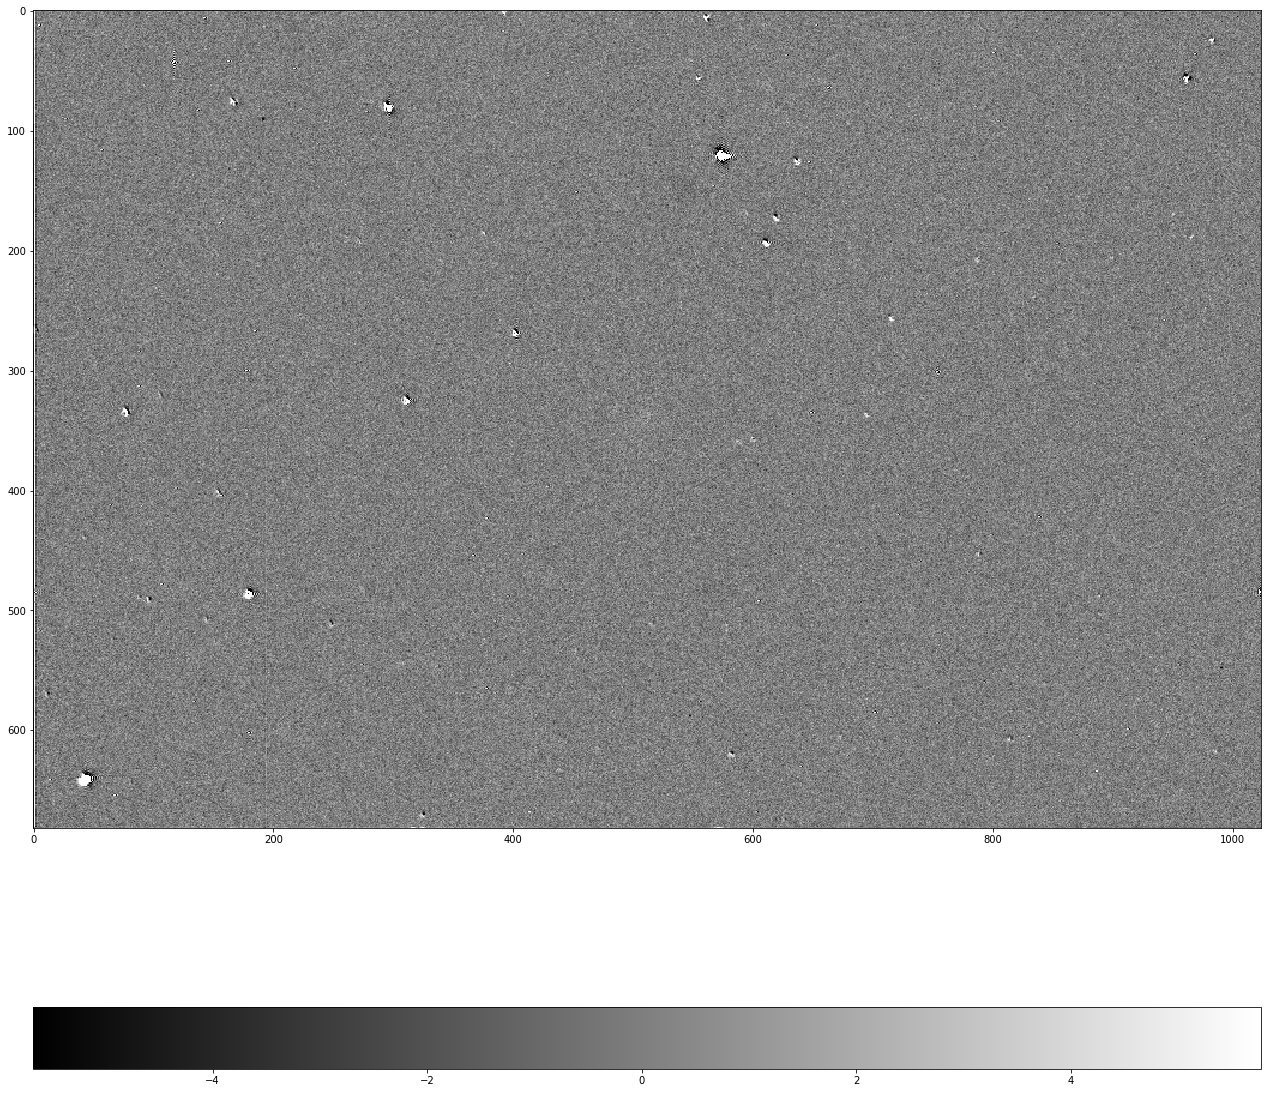

In [53]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(22, 22))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

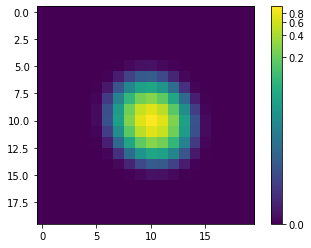

In [54]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

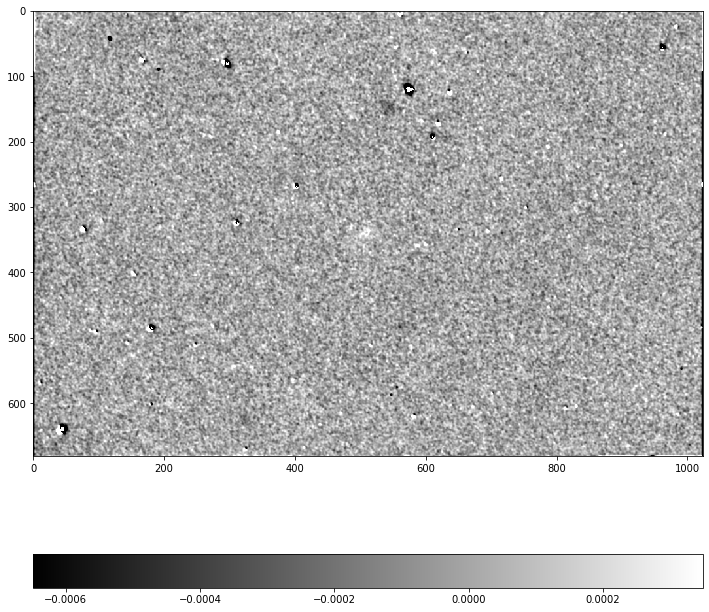

In [55]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

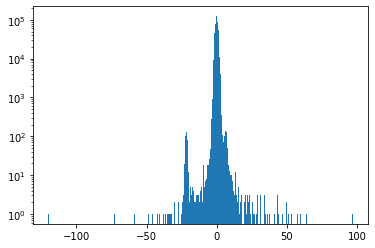

In [56]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

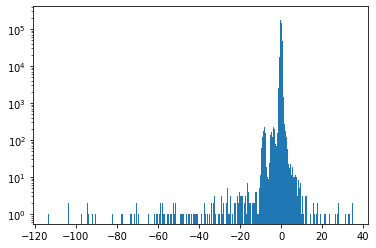

In [57]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-10, 4)
plt.show()